In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
time_points = 100
num_series = 50

In [3]:
def extract_features(time_series):
    # Ensure the time_series is a 2D array before standardization
    time_series = np.atleast_2d(time_series)
    standardized_series = (time_series - np.mean(time_series, axis=1, keepdims=True)) / np.std(time_series, axis=1, keepdims=True)
    return standardized_series

In [4]:
time_series_data = np.cumsum(np.random.randn(num_series, time_points), axis=1)

In [5]:
features = np.array([extract_features(ts) for ts in time_series_data])
features = features.reshape(num_series, -1)

In [6]:
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(features)
labels = kmeans.labels_

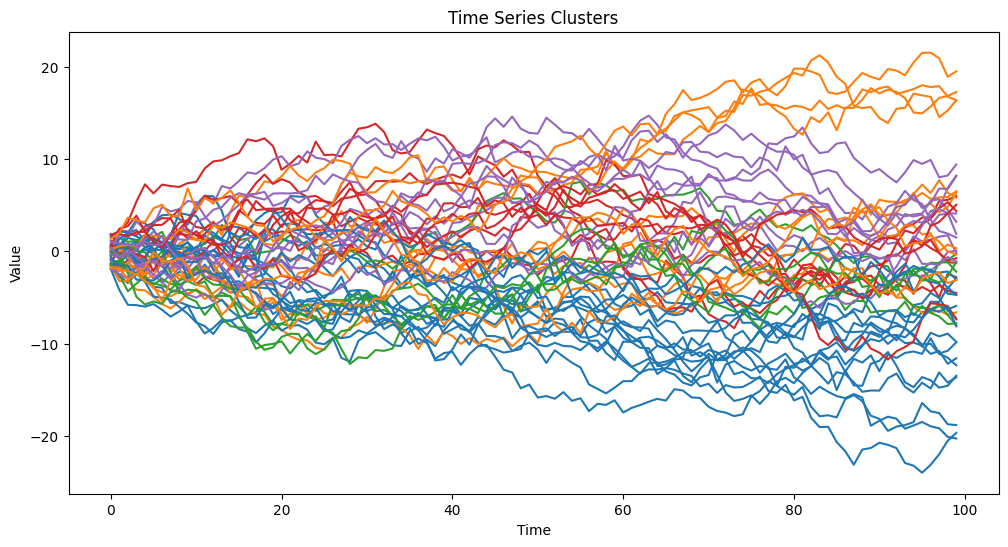

In [7]:
plt.figure(figsize=(12, 6))
for i, label in enumerate(labels):
    plt.plot(time_series_data[i], c=f'C{label}')

plt.title('Time Series Clusters')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()